# 다이아몬드 가격에 영향을 미치는 요인

이 클래식 데이터세트에는 거의 54,000개에 달하는 다이아몬드의 가격과 기타 속성이 포함되어 있다. 

컷, 색상, 투명도, 가격 및 기타 속성을 기준으로 다이아몬드를 분석합니다.

> https://www.kaggle.com/datasets/shivam2503/diamonds

| 변수 | 의미 | 기타 |
|---|---|---|
| carat | 무게 | ex) 3캐럿짜리 다이아몬드 |
| cut | 세공의 질 | 다이아몬드의 단면을 어떻게 커팅하였는지에 대한 상태값을 분류<br/>'계층이 있는 범주형(factor)' 데이터<br/>"Fair", "Good", "Very Good", "Premium", "Ideal"로 나누어진다. |
| color | 컬러 | 총 7개의 컬러로 표기된 범주형 데이터<br/>J (worst) to D (best)|
| clarity | 투명도 | 범주형 데이터<br/>I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) |
| depth | 깊이 | 수치형 데이터 |
| table | 넓은 폭 대비 꼭대기의 넓이 | 수치형 데이터 |
| price | 가격(미국 달러, ($326--$18,823) | 수치형 데이터 |
| x | 길이(mm)(0--10.74) | 수치형 데이터 |
| y | 넓이(mm)(0--58.9) | 수치형 데이터 |
|  z | 깊이(mm)(0--31.8) | 수치형 데이터 |

## #01. 준비작업

### [1] 패키지 참조

In [106]:
%%time

import warnings
warnings.filterwarnings(action='ignore')

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

from pandas import get_dummies

CPU times: total: 0 ns
Wall time: 0 ns


### [2] 데이터 가져오기

In [107]:
%%time

origin = my_read_excel("https://data.hossam.kr/mldata/diamonds.xlsx")
my_pretty_table(origin.head())

데이터프레임 크기: 행 수: 53940, 열 수: 10

데이터프레임 상위 5개 행

+----+---------+---------+---------+-----------+---------+---------+---------+------+------+------+
|    |   carat | cut     | color   | clarity   |   depth |   table |   price |    x |    y |    z |
|----+---------+---------+---------+-----------+---------+---------+---------+------+------+------|
|  0 |    0.23 | Ideal   | E       | SI2       |    61.5 |      55 |     326 | 3.95 | 3.98 | 2.43 |
|  1 |    0.21 | Premium | E       | SI1       |    59.8 |      61 |     326 | 3.89 | 3.84 | 2.31 |
|  2 |    0.23 | Good    | E       | VS1       |    56.9 |      65 |     327 | 4.05 | 4.07 | 2.31 |
|  3 |    0.29 | Premium | I       | VS2       |    62.4 |      58 |     334 |  4.2 | 4.23 | 2.63 |
|  4 |    0.31 | Good    | J       | SI2       |    63.3 |      58 |     335 | 4.34 | 4.35 | 2.75 |
+----+---------+---------+---------+-----------+---------+---------+---------+------+------+------+

데이터프레임 하위 5개 행

+-------+---------+-----------+----

## #02. 연속형 변수에 대한 탐색적 데이터 분석 및 전처리

### [1] 범주형 타입 변환

In [108]:
%%time
df = my_set_category(origin, "cut", "color", "clarity")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
CPU times: total: 15.6 ms
Wall time: 15.6 ms


### [2] 수치형 변수에 대한 기술통계량 확인

In [109]:
%%time
df.describe()

CPU times: total: 15.6 ms
Wall time: 15.6 ms


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 가격을 제외한 다른 데이터들의 평균 및 중앙값이 서로 상이한 것으로 보아 데이터 표준화가 필요한 것으로 보인다.

### [3] 수치형 변수에 대한 상자그림

#### (1) 전체 데이터 확인

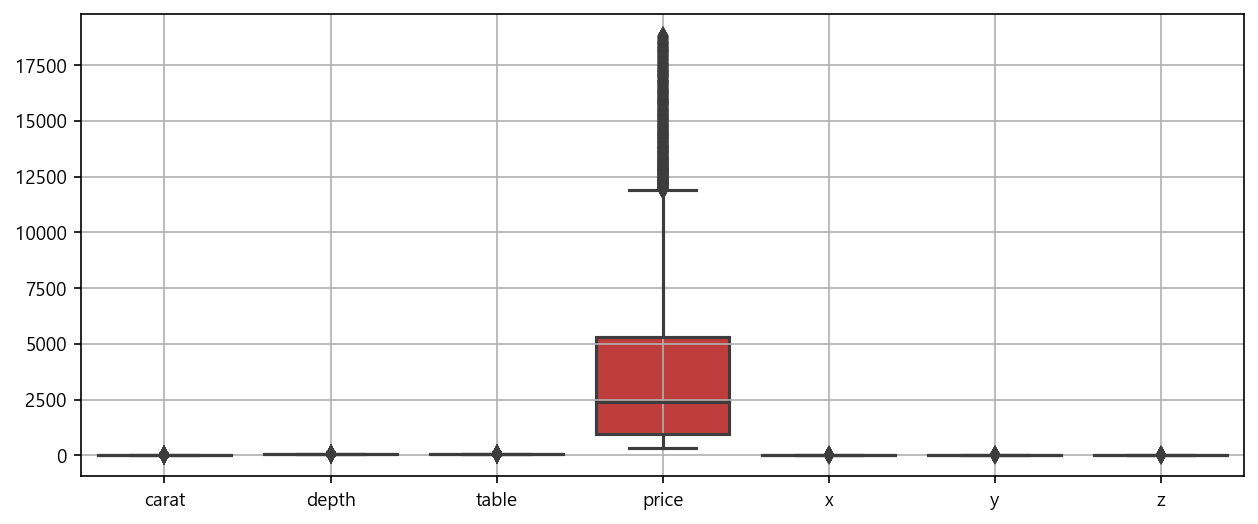

CPU times: total: 188 ms
Wall time: 187 ms


In [110]:
%%time
my_boxplot(df)

> 가격 데이터를 제외한 나머지 변수에 대한 분포 확인이 어려우므로 가격을 제외하고 표시해야 할 것 같다.

#### (2) 가격을 제외한 상자그림 확인

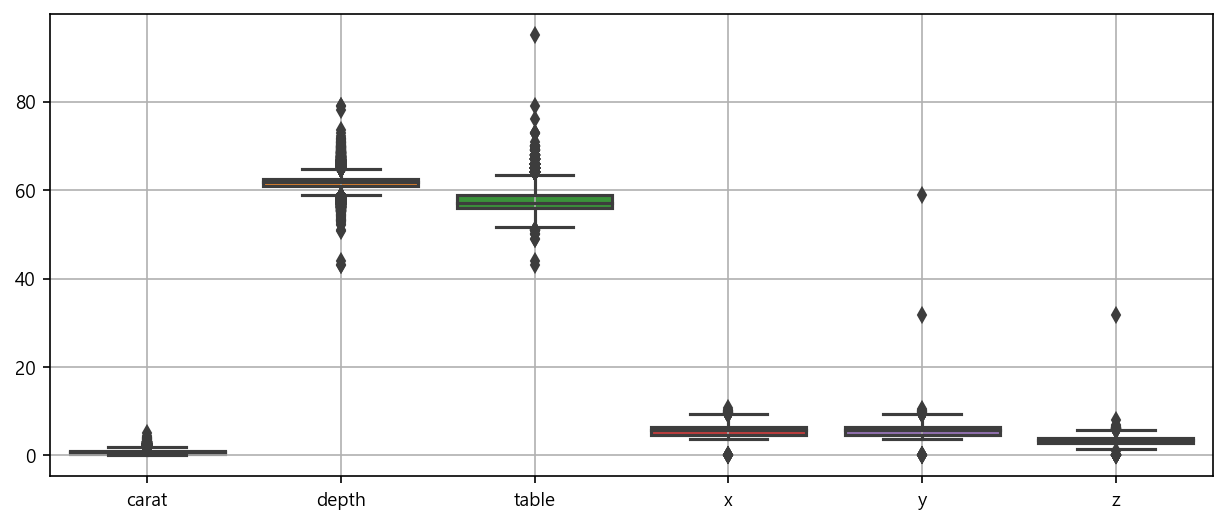

CPU times: total: 156 ms
Wall time: 156 ms


In [111]:
%%time
my_boxplot(df.drop('price', axis=1))

> 데이터 분포가 서로 상이한것이 확인되었으므로 데이터 표준화가 필요해 보인다.

### [4] 데이터 표준화

종속변수와 명목형을 제외하고 표준화를 시도한다.

#### (1) 표준화 수행

In [112]:
%%time
df2 = my_standard_scaler(df, 'price')
df2

CPU times: total: 15.6 ms
Wall time: 15.7 ms


,carat,depth,table,x,y,z,cut,color,clarity,price
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,Ideal,E,SI2,326
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,Premium,E,SI1,326
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,Good,E,VS1,327
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,Premium,I,VS2,334
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,Good,J,SI2,335
...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,Ideal,D,SI1,2757
53936,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,Good,D,SI1,2757
53937,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,Very Good,D,SI1,2757
53938,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,Premium,H,SI2,2757


#### (2) 표준화 결과에 대한 상자그림 확인

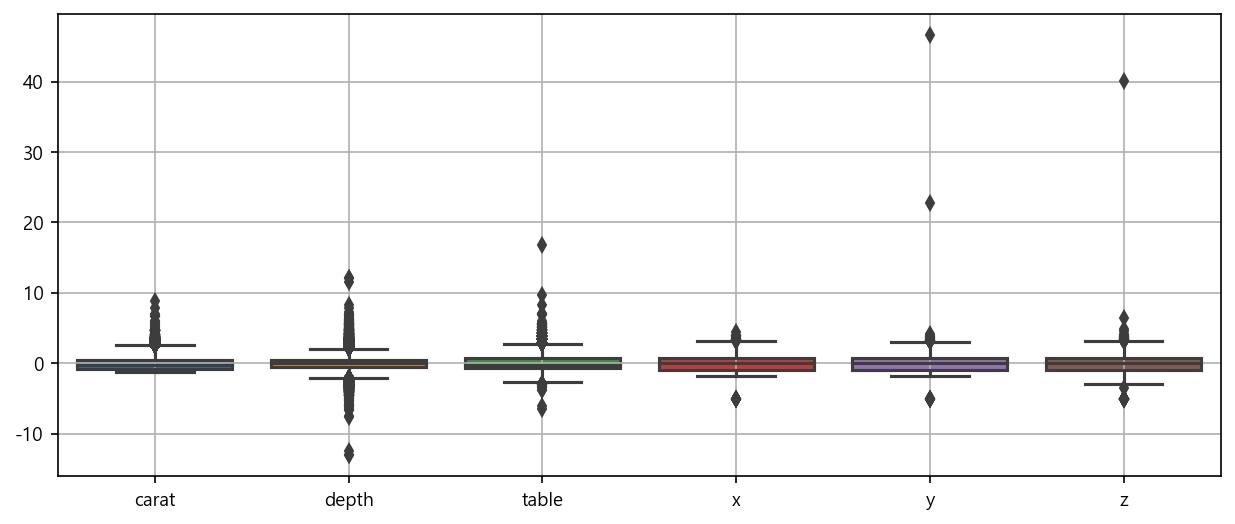

CPU times: total: 156 ms
Wall time: 162 ms


In [113]:
%%time
my_boxplot(df2.drop('price', axis=1))

> 일부 이상치가 발견되지만 대체적으로 데이터 분포가 균일해 졌다.

### [5] 이상치 정제

#### (1) 이상치 제거

In [114]:
%%time
df3 = my_replace_outliner_to_nan(df2).dropna()

print("제거된 데이터 비율: %f%%" % (100-(len(df3) / len(df2) * 100)))
df3.info()

제거된 데이터 비율: 11.894698%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47524 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    47524 non-null  float64 
 1   depth    47524 non-null  float64 
 2   table    47524 non-null  float64 
 3   x        47524 non-null  float64 
 4   y        47524 non-null  float64 
 5   z        47524 non-null  float64 
 6   price    47524 non-null  float64 
 7   cut      47524 non-null  category
 8   color    47524 non-null  category
 9   clarity  47524 non-null  category
dtypes: category(3), float64(7)
memory usage: 3.0 MB
CPU times: total: 31.2 ms
Wall time: 31.2 ms


> 상당히 많은 데이터(10% 이상)가 제거되었으므로 이상치 소거는 적절한 방법이 아닌 것으로 판단된다. 이상치를 경계값으로 대체하는 것이 좋을 듯 하다.

#### (2) 이상치를 경계값으로 대체

In [115]:
%%time
df3 = my_replace_outliner(df2)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   depth    53940 non-null  float64 
 2   table    53940 non-null  float64 
 3   x        53940 non-null  float64 
 4   y        53940 non-null  float64 
 5   z        53940 non-null  float64 
 6   price    53940 non-null  float64 
 7   cut      53940 non-null  category
 8   color    53940 non-null  category
 9   clarity  53940 non-null  category
dtypes: category(3), float64(7)
memory usage: 3.0 MB
CPU times: total: 31.2 ms
Wall time: 31.2 ms


#### (3) 상자그림 재확인

##### 종속변수

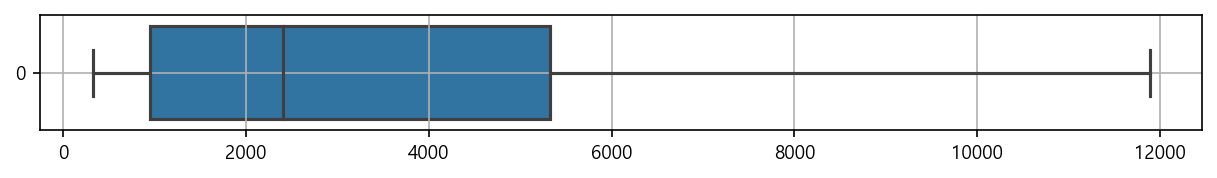

CPU times: total: 78.1 ms
Wall time: 78.1 ms


In [116]:
%%time
my_boxplot(df3['price'], orient='h', figsize=[10, 1])

##### 독립변수

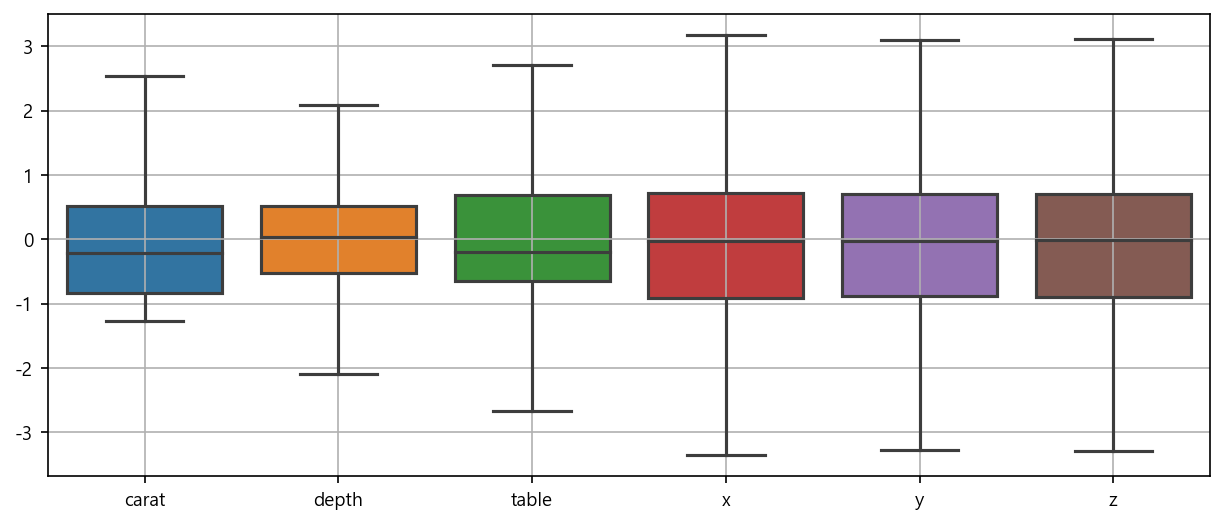

CPU times: total: 141 ms
Wall time: 141 ms


In [117]:
%%time
my_boxplot(df3.drop('price', axis=1))

> 데이터가 이뻐졌다.

### [6] 수치형 변수간의 상관관계 확인

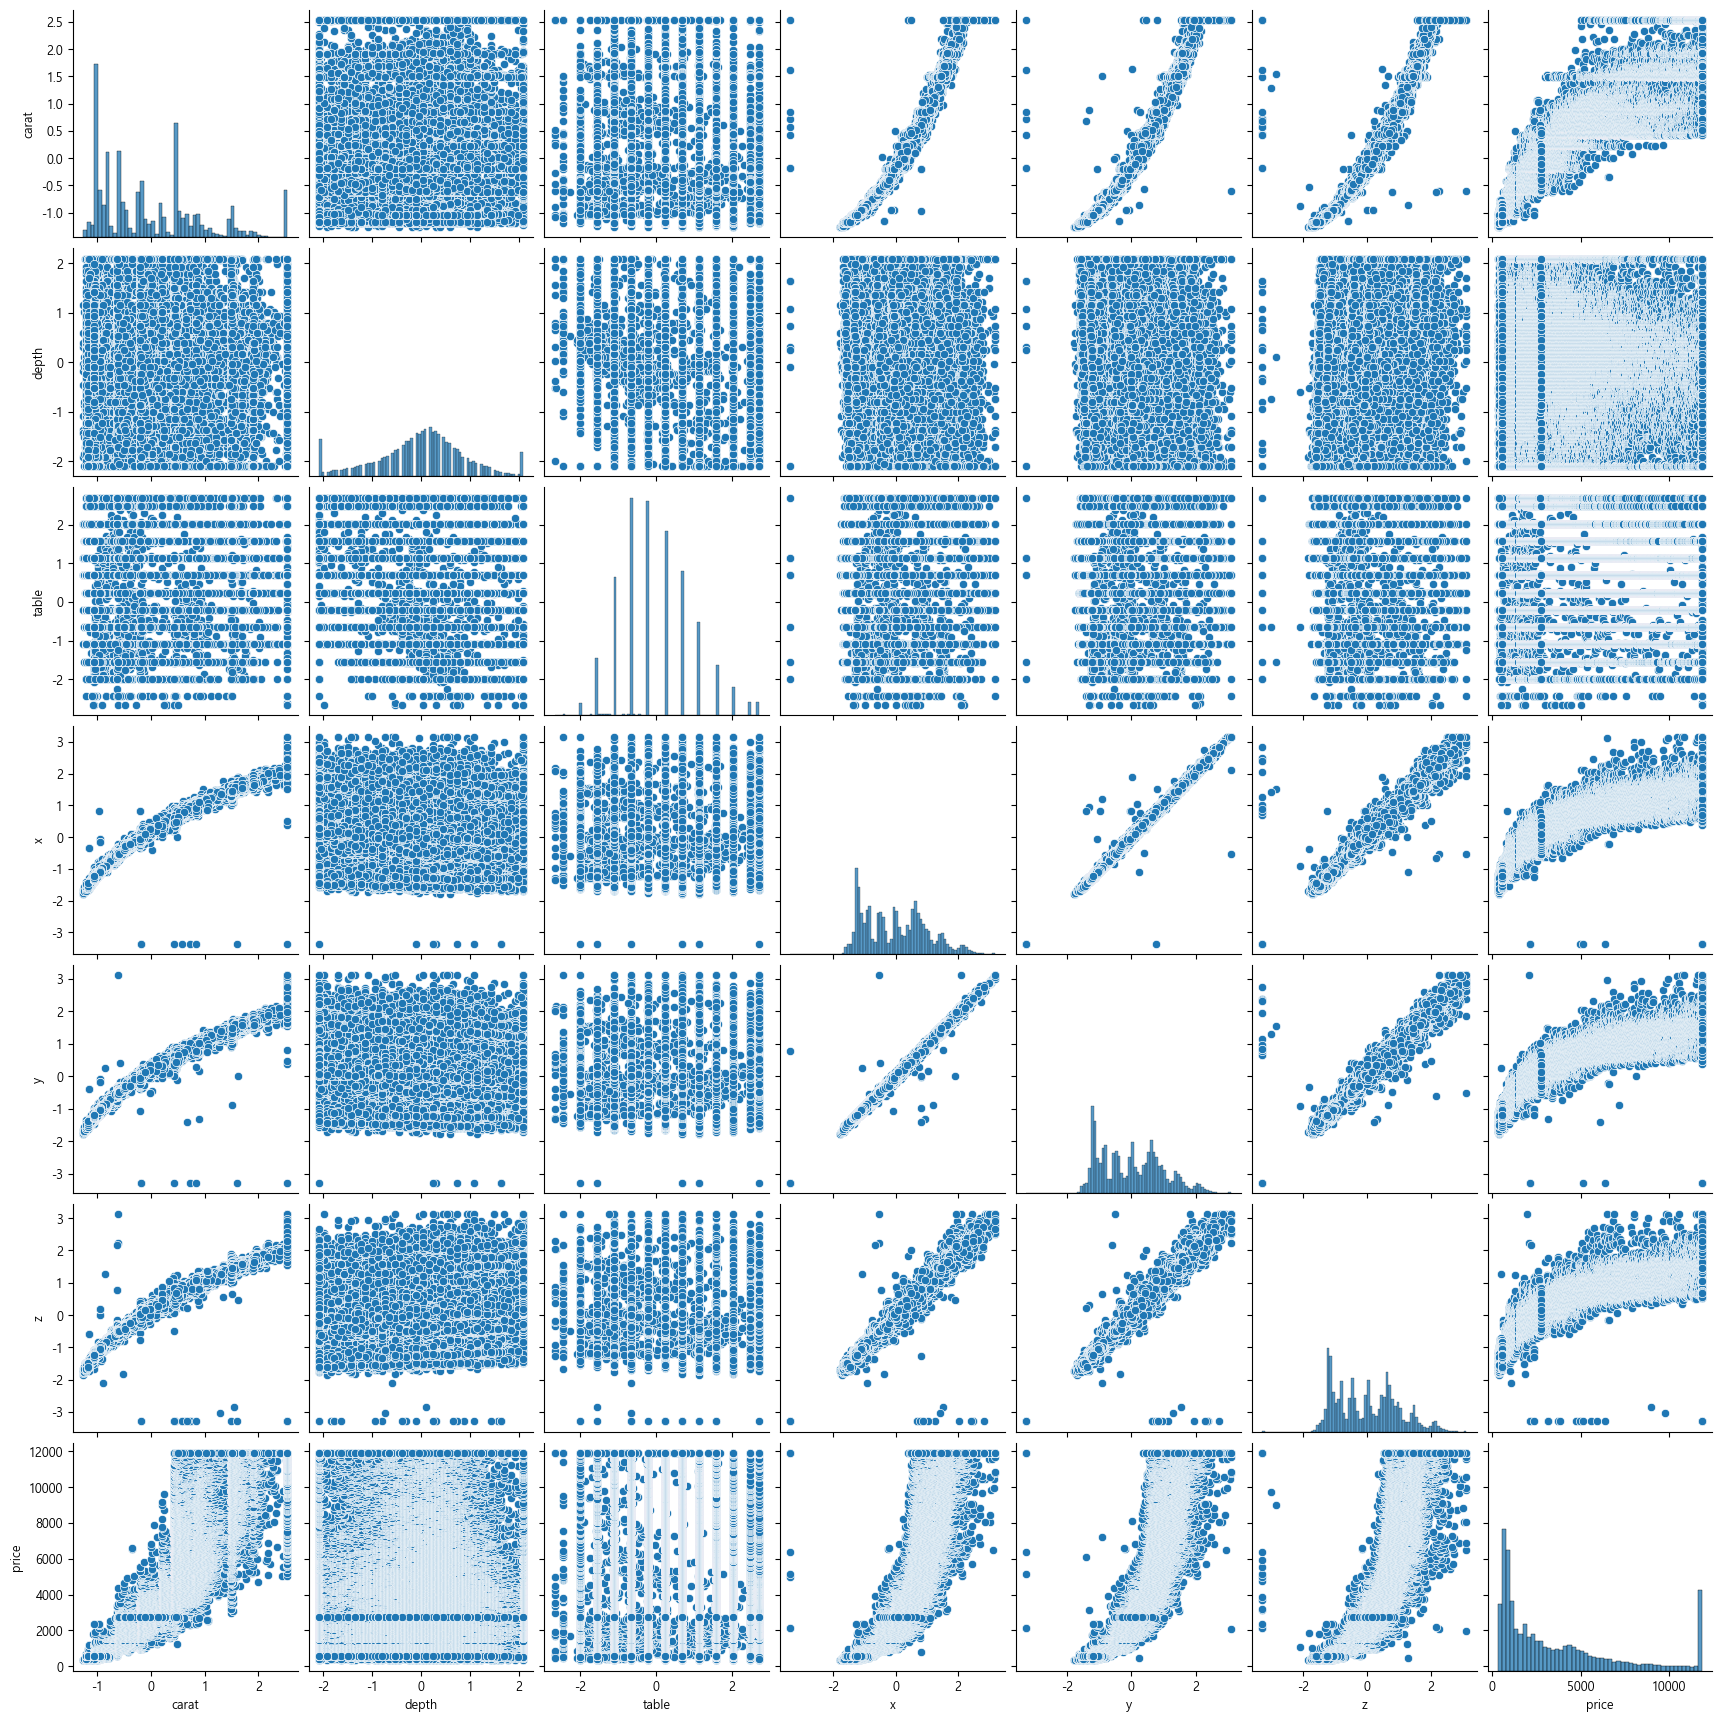

CPU times: total: 11.9 s
Wall time: 11.9 s


In [118]:
%%time
my_pairplot(df3)

> x, y, z 간에 자기상관성이 있는 것으로 보인다. 이 요인들 중 어떤 값이 가장 VIF가 높은지 판별하여 분석모델 적용 과정에서 제외하는 것이 필요해 보인다.

## #03. 연속형 변수만을 사용한 선형회귀 분석

### [1] 연속형 변수만 추출

In [119]:
df4 = df3[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
my_pretty_table(df4.head())

+----+----------+-----------+----------+----------+----------+----------+---------+
|    |    carat |     depth |    table |        x |        y |        z |   price |
|----+----------+-----------+----------+----------+----------+----------+---------|
|  0 | -1.19817 | -0.174092 | -1.09967 | -1.58784 |  -1.5362 | -1.57113 |     326 |
|  1 | -1.24036 |  -1.36074 |  1.58553 | -1.64133 | -1.65877 | -1.74117 |     326 |
|  2 | -1.19817 |  -2.09367 |  2.70436 | -1.49869 |  -1.4574 | -1.74117 |     327 |
|  3 | -1.07159 |  0.454133 | 0.242928 | -1.36497 | -1.31731 | -1.28772 |     334 |
|  4 | -1.02939 |   1.08236 | 0.242928 | -1.24017 | -1.21224 | -1.11767 |     335 |
+----+----------+-----------+----------+----------+----------+----------+---------+


### [2] 전체 변수에 대한 처리

In [120]:
%%time
yname = 'price'
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 4246.956 * carat + -191.148 * depth + -182.008 * table + -2258.244 * x + 1672.442 * y + -235.356 * z + 3780.152

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.883597 |             750.731 |         1.37354e+06 |          1171.98 |                         26.0572 |              -3.49912 |
| 검증데이터 |       0.885029 |             749.394 |         1.36315e+06 |          1167.54 |                         26.1237 |              -3.29167 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[

LinearRegression(n_jobs=-1)

### [3] 다중공선성이 높은 변수들을 차례로 제거

#### (1) `x` 제거

In [121]:
%%time
yname = 'price'
ignore = ['x']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 4131.234 * carat + -145.248 * depth + -197.221 * table + -146.174 * y + -613.740 * z + 3776.524

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.882361 |              752.87 |         1.38812e+06 |          1178.19 |                         26.0322 |              -2.88781 |
| 검증데이터 |       0.883291 |             753.581 |         1.38375e+06 |          1176.33 |                         26.2091 |              -2.71639 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]


LinearRegression(n_jobs=-1)

#### (2) `x`, `y` 제거

In [122]:
%%time
yname = 'price'
ignore = ['x', 'y']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 4103.837 * carat + -127.508 * depth + -196.513 * table + -732.225 * z + 3776.327

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.882347 |             753.728 |         1.38828e+06 |          1178.25 |                         26.1538 |              -2.75747 |
| 검증데이터 |       0.883279 |             754.528 |          1.3839e+06 |          1176.39 |                         26.3337 |              -2.57709 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+---------

LinearRegression(n_jobs=-1)

#### (3) `x`, `y`, `z` 제거

In [123]:
%%time
yname = 'price'
ignore = ['x', 'y', 'z']
df5 = df4.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 3376.144 * carat + -181.889 * depth + -192.945 * table + 3768.517

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.880577 |             788.857 |         1.40917e+06 |          1187.08 |                         30.6789 |              0.919157 |
| 검증데이터 |       0.880932 |             792.092 |         1.41173e+06 |          1188.16 |                         31.0595 |               1.05342 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+------------+-----------

LinearRegression(n_jobs=-1)

## #04. 명목형 변수에 대한 탐색적 데이터 분석 및 전처리

앞 단계에서 `df3` 모든 변수를 포함하고 있으면서, 변수가 스케일링이 적용된 상태이다.

### [1] 명목형 변수 라벨링

서열 척도이므로 좋은 상태를 `1`, 좋지 않은 상태를 `n`으로 순차적으로 배치한다.

In [124]:
df4 = df3.copy()
df4['cut'] = df4['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df4['color'] = df4['color'].map({'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})
df4['clarity'] = df4['clarity'].map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})
my_pretty_table(df4.head())

+----+----------+-----------+----------+----------+----------+----------+---------+-------+---------+-----------+
|    |    carat |     depth |    table |        x |        y |        z |   price |   cut |   color |   clarity |
|----+----------+-----------+----------+----------+----------+----------+---------+-------+---------+-----------|
|  0 | -1.19817 | -0.174092 | -1.09967 | -1.58784 |  -1.5362 | -1.57113 |     326 |     5 |       2 |         2 |
|  1 | -1.24036 |  -1.36074 |  1.58553 | -1.64133 | -1.65877 | -1.74117 |     326 |     4 |       2 |         3 |
|  2 | -1.19817 |  -2.09367 |  2.70436 | -1.49869 |  -1.4574 | -1.74117 |     327 |     2 |       2 |         5 |
|  3 | -1.07159 |  0.454133 | 0.242928 | -1.36497 | -1.31731 | -1.28772 |     334 |     4 |       6 |         4 |
|  4 | -1.02939 |   1.08236 | 0.242928 | -1.24017 | -1.21224 | -1.11767 |     335 |     2 |       7 |         2 |
+----+----------+-----------+----------+----------+----------+----------+---------+-----

### [2] 명목형 변수에 대한 빈도 확인

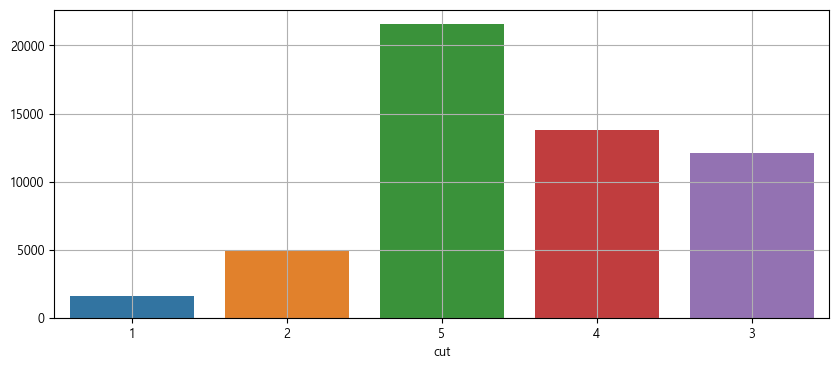

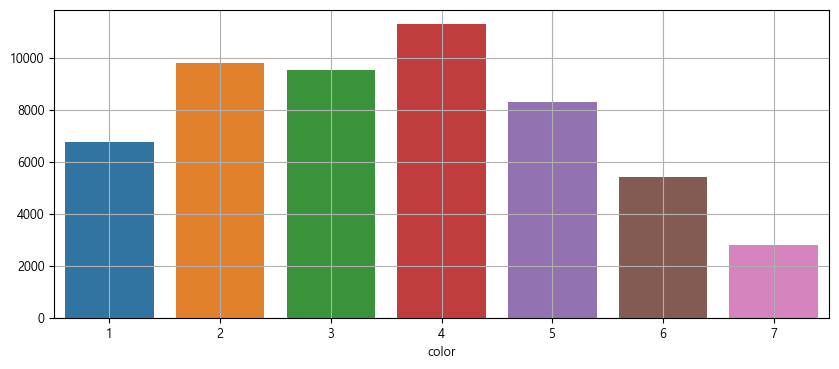

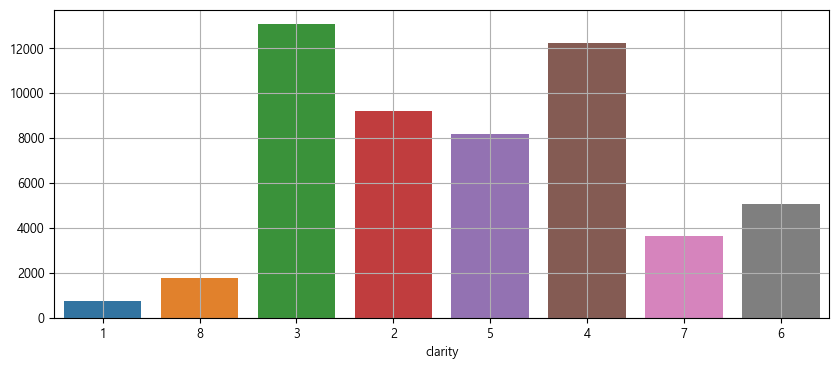

In [125]:
for c in df4.columns:
    if df[c].dtypes == 'category':
        my_countplot(df4, c, dpi=100)

> 모든 명목형 변수들에 대해 데이터 불균형이 존재한다.

### [3] 통제요인 선정하기

#### (1) `cut`

통제요인을 선정하는 방법은 다양하지만 일반적으로 연구 주제에 대한 선행 연구나 이론적 배경을 토대로 선정한다.

선정된 통제요인들을 대상으로 `t-test`나 `anova` 같은 차이 분석을 실행하고 종속변수에서 유의미한 차이가 발견될 경우 통제변수로 사용한다.

In [126]:
df_cut = df4[['cut', 'price']]
df_cut

,cut,price
0,5,326.0
1,4,326.0
2,2,327.0
3,4,334.0
4,2,335.0
...,...,...
53935,5,2757.0
53936,2,2757.0
53937,3,2757.0
53938,4,2757.0


In [127]:
my_normal_equal_var_1field(df_cut, xname='price', hue='cut')

+---------+-------------+--------------+----------+
| field   |   statistic |      p-value | result   |
|---------+-------------+--------------+----------|
| 5       |     4365.55 |            0 | False    |
| 4       |     1542.25 |            0 | False    |
| 2       |     769.856 | 6.72751e-168 | False    |
| 3       |     1665.27 |            0 | False    |
| 1       |     289.705 |   1.2344e-63 | False    |
| Levene  |     134.205 | 2.71332e-114 | False    |
+---------+-------------+--------------+----------+


In [128]:
my_anova(df_cut, target='price', hue='cut', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+--------------+-----------+
|    | Source   |   ddof1 |   ddof2 |       F |        p-unc |       np2 |
|----+----------+---------+---------+---------+--------------+-----------|
|  0 | cut      |       4 | 9415.59 | 184.398 | 2.15314e-152 | 0.0140389 |
+----+----------+---------+---------+---------+--------------+-----------+

statsmodels.anova.anova_lm
+----------+-------+-------------+-------------+---------+--------------+
|          |    df |      sum_sq |     mean_sq |       F |       PR(>F) |
|----------+-------+-------------+-------------+---------+--------------|
| C(cut)   |     4 | 8.94409e+09 | 2.23602e+09 | 191.992 | 9.84495e-164 |
| Residual | 53935 |  6.2815e+11 | 1.16464e+07 |     nan |          nan |
+----------+-------+-------------+-------------+---------+--------------+
[anova_lm] statistic: 191.992, p-value: 0.000, 대립가설 채택


#### (2) `color`

In [129]:
df_color = df4[['color', 'price']]
my_normal_equal_var_1field(df_color, xname='price', hue='color')

+---------+-------------+--------------+----------+
| field   |   statistic |      p-value | result   |
|---------+-------------+--------------+----------|
| 2       |     2843.79 |            0 | False    |
| 6       |     909.313 | 3.50882e-198 | False    |
| 7       |     450.258 |  1.68928e-98 | False    |
| 5       |     852.589 | 7.28852e-186 | False    |
| 3       |     1688.39 |            0 | False    |
| 4       |     1446.44 |            0 | False    |
| 1       |     1843.13 |            0 | False    |
| Levene  |     230.897 | 2.12011e-292 | False    |
+---------+-------------+--------------+----------+


In [130]:
my_anova(df_color, target='price', hue='color', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+---------+-----------+
|    | Source   |   ddof1 |   ddof2 |       F |   p-unc |       np2 |
|----+----------+---------+---------+---------+---------+-----------|
|  0 | color    |       6 | 18364.4 | 299.885 |       0 | 0.0326912 |
+----+----------+---------+---------+---------+---------+-----------+

statsmodels.anova.anova_lm
+----------+-------+-------------+-------------+---------+----------+
|          |    df |      sum_sq |     mean_sq |       F |   PR(>F) |
|----------+-------+-------------+-------------+---------+----------|
| C(color) |     6 | 2.08274e+10 | 3.47123e+09 | 303.787 |        0 |
| Residual | 53933 | 6.16267e+11 | 1.14265e+07 |     nan |      nan |
+----------+-------+-------------+-------------+---------+----------+
[anova_lm] statistic: 303.787, p-value: 0.000, 대립가설 채택


#### (3) `clarity`

In [131]:
df_clarity = df4[['clarity', 'price']]
my_normal_equal_var_1field(df_clarity, xname='price', hue='clarity')

+---------+-------------+--------------+----------+
| field   |   statistic |      p-value | result   |
|---------+-------------+--------------+----------|
| 2       |     974.898 | 2.01202e-212 | False    |
| 3       |     1979.89 |            0 | False    |
| 5       |     1104.98 | 1.13813e-240 | False    |
| 4       |     1675.57 |            0 | False    |
| 6       |     982.149 | 5.35971e-214 | False    |
| 7       |     1454.54 |            0 | False    |
| 1       |     132.912 |  1.37584e-29 | False    |
| 8       |     603.978 | 7.04329e-132 | False    |
| Levene  |     87.5442 | 2.32237e-127 | False    |
+---------+-------------+--------------+----------+


In [132]:
my_anova(df_clarity, target='price', hue='clarity', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+---------+-----------+
|    | Source   |   ddof1 |   ddof2 |       F |   p-unc |       np2 |
|----+----------+---------+---------+---------+---------+-----------|
|  0 | clarity  |       7 | 8520.29 | 247.882 |       0 | 0.0292055 |
+----+----------+---------+---------+---------+---------+-----------+

statsmodels.anova.anova_lm
+------------+-------+-------------+-------------+---------+----------+
|            |    df |      sum_sq |     mean_sq |       F |   PR(>F) |
|------------+-------+-------------+-------------+---------+----------|
| C(clarity) |     7 | 1.86067e+10 |  2.6581e+09 | 231.786 |        0 |
| Residual   | 53932 | 6.18488e+11 | 1.14679e+07 |     nan |      nan |
+------------+-------+-------------+-------------+---------+----------+
[anova_lm] statistic: 231.786, p-value: 0.000, 대립가설 채택


### [4] 선정된 통제요인을 더미변수로 변환

In [133]:
df5 = get_dummies(df4, columns=['cut', 'color', 'clarity'], drop_first=True)
my_pretty_table(df5.head())

+----+----------+-----------+----------+----------+----------+----------+---------+---------+---------+---------+---------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|    |    carat |     depth |    table |        x |        y |        z |   price |   cut_2 |   cut_5 |   cut_4 |   cut_3 |   color_2 |   color_3 |   color_4 |   color_5 |   color_6 |   color_7 |   clarity_8 |   clarity_3 |   clarity_2 |   clarity_5 |   clarity_4 |   clarity_7 |   clarity_6 |
|----+----------+-----------+----------+----------+----------+----------+---------+---------+---------+---------+---------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+-------------+-------------+-------------|
|  0 | -1.19817 | -0.174092 | -1.09967 | -1.58784 |  -1.5362 | -1.57113 |     326 |       0 |       1 |       0 |     

## #05. 통제요인을 적용한 선형회귀 분석

### [1] 전체 요인에 대한 분석

In [134]:
x_test, x_train, y_test, y_train = my_train_test_split(df5, 'price', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 4445.847 * carat + -14.492 * depth + -41.063 * table + -1221.503 * x + 819.519 * y + -212.456 * z + 376.817 * cut_2 + 656.570 * cut_5 + 611.205 * cut_4 + 560.711 * cut_3 + -161.325 * color_2 + -213.667 * color_3 + -368.452 * color_4 + -824.125 * color_5 + -1286.146 * color_6 + -1900.520 * color_7 + 3820.556 * clarity_8 + 2357.618 * clarity_3 + 1559.854 * clarity_2 + 3161.640 * clarity_5 + 2881.528 * clarity_4 + 3533.810 * clarity_7 + 3534.888 * clarity_6 + 1036.126

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.940849 |             598.349 |              701325 |          837.452 |   

LinearRegression(n_jobs=-1)

> `x,y,z`에 대해서는 통제요인이 없는 경우와 비슷한 VIF값을 보이므로 이 값들은 여전히 다중공선성이 존재한다고 볼 수 있다. 그러므로 이 요인들을 제거하고 다시 수행해야 한다.

### [2] 다중공선성을 제거하고 수행

In [135]:
df6 = df5.drop(['x', 'y', 'z'], axis=1)
x_test, x_train, y_test, y_train = my_train_test_split(df6, 'price', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 3812.071 * carat + -7.726 * depth + -38.180 * table + 452.390 * cut_2 + 728.781 * cut_5 + 656.077 * cut_4 + 652.783 * cut_3 + -163.491 * color_2 + -230.267 * color_3 + -378.189 * color_4 + -824.812 * color_5 + -1267.651 * color_6 + -1889.021 * color_7 + 3930.545 * clarity_8 + 2385.597 * clarity_3 + 1581.007 * clarity_2 + 3213.859 * clarity_5 + 2930.880 * clarity_4 + 3632.014 * clarity_7 + 3613.245 * clarity_6 + 915.017

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.939728 |             617.794 |              714619 |          845.351 |                         35.1625 |               8

LinearRegression(n_jobs=-1)

### [3] 유의하지 않은 변수를 제거하고 다시 수행

In [136]:
df6 = df5.drop(['depth', 'x', 'y', 'z'], axis=1)
x_test, x_train, y_test, y_train = my_train_test_split(df6, 'price', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 3811.835 * carat + -34.805 * table + 456.789 * cut_2 + 741.321 * cut_5 + 667.118 * cut_4 + 661.916 * cut_3 + -163.400 * color_2 + -230.294 * color_3 + -378.649 * color_4 + -825.425 * color_5 + -1268.303 * color_6 + -1890.044 * color_7 + 3932.270 * clarity_8 + 2385.425 * clarity_3 + 1581.351 * clarity_2 + 3214.461 * clarity_5 + 2931.193 * clarity_4 + 3632.783 * clarity_7 + 3613.347 * clarity_6 + 904.820

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.939725 |             617.758 |              714653 |          845.371 |                         35.1522 |               8.91815 |
| 검증데이터 

LinearRegression(n_jobs=-1)

> 통제요인을 적용하지 않은 경우 $R^2$값이 `88%`였지만 통제요인을 적용한 후의 $R^2$값은 `93%`로 더 좋은 성능을 보였다.

## #06. 명목형 변수로부터 파생변수 생성

서열 척도를 good, bad 두 가지로 구분하여 적용해 본 경우

### [1] 라벨링

In [137]:
df4 = df3.copy()
df4['cut'] = df4['cut'].map({'Fair': 'good', 'Good': 'good', 'Very Good': 'good', 'Premium': 'bad', 'Ideal': 'bad'})
df4['color'] = df4['color'].map({'D': 'good', 'E': 'good', 'F': 'good', 'G': 'bad', 'H': 'bad', 'I': 'bad', 'J': 'bad'})
df4['clarity'] = df4['clarity'].map({'I1': 'Good', 'SI2': 'Good', 'SI1': 'Good', 'VS2': 'Good', 'VS1': 'bad', 'VVS2': 'bad', 'VVS1': 'bad', 'IF': 'bad'})
my_pretty_table(df4.head())

+----+----------+-----------+----------+----------+----------+----------+---------+-------+---------+-----------+
|    |    carat |     depth |    table |        x |        y |        z |   price | cut   | color   | clarity   |
|----+----------+-----------+----------+----------+----------+----------+---------+-------+---------+-----------|
|  0 | -1.19817 | -0.174092 | -1.09967 | -1.58784 |  -1.5362 | -1.57113 |     326 | bad   | good    | Good      |
|  1 | -1.24036 |  -1.36074 |  1.58553 | -1.64133 | -1.65877 | -1.74117 |     326 | bad   | good    | Good      |
|  2 | -1.19817 |  -2.09367 |  2.70436 | -1.49869 |  -1.4574 | -1.74117 |     327 | good  | good    | bad       |
|  3 | -1.07159 |  0.454133 | 0.242928 | -1.36497 | -1.31731 | -1.28772 |     334 | bad   | bad     | Good      |
|  4 | -1.02939 |   1.08236 | 0.242928 | -1.24017 | -1.21224 | -1.11767 |     335 | good  | bad     | Good      |
+----+----------+-----------+----------+----------+----------+----------+---------+-----

### [2] 통제요인 선정

#### (1) `clarity`

In [138]:
df_clarity = df4[['clarity', 'price']]
my_normal_equal_var_1field(df_clarity, xname='price', hue='clarity')

+---------+-------------+-------------+----------+
| field   |   statistic |     p-value | result   |
|---------+-------------+-------------+----------|
| Good    |     4534.84 |           0 | False    |
| bad     |     3720.65 |           0 | False    |
| Levene  |     156.252 | 8.36139e-36 | False    |
+---------+-------------+-------------+----------+


In [139]:
my_anova(df_clarity, target='price', hue='clarity', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+--------------+-----------+
|    | Source   |   ddof1 |   ddof2 |       F |        p-unc |       np2 |
|----+----------+---------+---------+---------+--------------+-----------|
|  0 | clarity  |       1 | 37566.6 | 695.395 | 7.27263e-152 | 0.0128453 |
+----+----------+---------+---------+---------+--------------+-----------+

statsmodels.anova.anova_lm
+------------+-------+-------------+-------------+---------+--------------+
|            |    df |      sum_sq |     mean_sq |       F |       PR(>F) |
|------------+-------+-------------+-------------+---------+--------------|
| C(clarity) |     1 | 8.18367e+09 | 8.18367e+09 | 701.866 | 1.13727e-153 |
| Residual   | 53938 | 6.28911e+11 | 1.16599e+07 |     nan |          nan |
+------------+-------+-------------+-------------+---------+--------------+
[anova_lm] statistic: 701.866, p-value: 0.000, 대립가설 채택


#### (2) color

In [140]:
df_color = df4[['color', 'price']]
my_normal_equal_var_1field(df_color, xname='price', hue='color')

+---------+-------------+--------------+----------+
| field   |   statistic |      p-value | result   |
|---------+-------------+--------------+----------|
| good    |     6234.12 |            0 | False    |
| bad     |     3073.69 |            0 | False    |
| Levene  |     1233.06 | 4.17794e-267 | False    |
+---------+-------------+--------------+----------+


In [141]:
my_anova(df_color, target='price', hue='color', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+------------+----------+
|    | Source   |   ddof1 |   ddof2 |       F |      p-unc |      np2 |
|----+----------+---------+---------+---------+------------+----------|
|  0 | color    |       1 | 53385.9 | 1225.55 | 1.767e-265 | 0.021991 |
+----+----------+---------+---------+---------+------------+----------+

statsmodels.anova.anova_lm
+----------+-------+-------------+-------------+---------+--------------+
|          |    df |      sum_sq |     mean_sq |       F |       PR(>F) |
|----------+-------+-------------+-------------+---------+--------------|
| C(color) |     1 | 1.40103e+10 | 1.40103e+10 | 1212.82 | 8.34261e-263 |
| Residual | 53938 | 6.23084e+11 | 1.15519e+07 |     nan |          nan |
+----------+-------+-------------+-------------+---------+--------------+
[anova_lm] statistic: 1212.820, p-value: 0.000, 대립가설 채택


#### (3) clarity

In [142]:
df_clarity = df4[['clarity', 'price']]
my_normal_equal_var_1field(df_clarity, xname='price', hue='clarity')

+---------+-------------+-------------+----------+
| field   |   statistic |     p-value | result   |
|---------+-------------+-------------+----------|
| Good    |     4534.84 |           0 | False    |
| bad     |     3720.65 |           0 | False    |
| Levene  |     156.252 | 8.36139e-36 | False    |
+---------+-------------+-------------+----------+


In [143]:
my_anova(df_clarity, target='price', hue='clarity', equal_var=False)

pingouin.welch_anova
+----+----------+---------+---------+---------+--------------+-----------+
|    | Source   |   ddof1 |   ddof2 |       F |        p-unc |       np2 |
|----+----------+---------+---------+---------+--------------+-----------|
|  0 | clarity  |       1 | 37566.6 | 695.395 | 7.27263e-152 | 0.0128453 |
+----+----------+---------+---------+---------+--------------+-----------+

statsmodels.anova.anova_lm
+------------+-------+-------------+-------------+---------+--------------+
|            |    df |      sum_sq |     mean_sq |       F |       PR(>F) |
|------------+-------+-------------+-------------+---------+--------------|
| C(clarity) |     1 | 8.18367e+09 | 8.18367e+09 | 701.866 | 1.13727e-153 |
| Residual   | 53938 | 6.28911e+11 | 1.16599e+07 |     nan |          nan |
+------------+-------+-------------+-------------+---------+--------------+
[anova_lm] statistic: 701.866, p-value: 0.000, 대립가설 채택


### [3] 더미변수 생성

In [144]:
df5 = get_dummies(df4, columns=['cut', 'color', 'clarity'], drop_first=True)
my_pretty_table(df5.head())

+----+----------+-----------+----------+----------+----------+----------+---------+------------+--------------+---------------+
|    |    carat |     depth |    table |        x |        y |        z |   price |   cut_good |   color_good |   clarity_bad |
|----+----------+-----------+----------+----------+----------+----------+---------+------------+--------------+---------------|
|  0 | -1.19817 | -0.174092 | -1.09967 | -1.58784 |  -1.5362 | -1.57113 |     326 |          0 |            1 |             0 |
|  1 | -1.24036 |  -1.36074 |  1.58553 | -1.64133 | -1.65877 | -1.74117 |     326 |          0 |            1 |             0 |
|  2 | -1.19817 |  -2.09367 |  2.70436 | -1.49869 |  -1.4574 | -1.74117 |     327 |          1 |            1 |             1 |
|  3 | -1.07159 |  0.454133 | 0.242928 | -1.36497 | -1.31731 | -1.28772 |     334 |          0 |            0 |             0 |
|  4 | -1.02939 |   1.08236 | 0.242928 | -1.24017 | -1.21224 | -1.11767 |     335 |          1 |        

### [4] 불필요한 요인 제거

In [145]:
df6 = df5.drop(['x', 'y', 'z'], axis=1)
x_test, x_train, y_test, y_train = my_train_test_split(df6, 'price', test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
price = 3596.940 * carat + -79.260 * depth + -115.109 * table + -175.265 * cut_good + 606.955 * color_good + 1103.674 * clarity_bad + 3156.576

+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.906713 |              741.53 |         1.10606e+06 |          1051.69 |                         35.6789 |               5.06551 |
| 검증데이터 |       0.906474 |             740.991 |         1.10359e+06 |          1050.52 |                         35.7386 |               5.50204 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+---

LinearRegression(n_jobs=-1)